In [2]:
#run only once!
%load_ext autoreload
%autoreload 2
import os
os.chdir(os.path.abspath(os.path.join(os.getcwd(), os.pardir)))

In [3]:
import numpy as np
from phidl import LayerSet
from phidl import quickplot as qp
from phidl import Path, CrossSection, Device
import phidl.path as pp
import phidl.geometry as pg
import phidl
import matplotlib.pyplot as plt
# from deprecated.Bertram_Functions.MyPhidlFunctions import *
from Schuster_Resonators.resonator import ChipResonatorsTline, ChipTline, ChipResonatorsTwoTlines
from Schuster_Resonators.approx_Schuster import *
from CPW.cpw import *

In [4]:
Lk = 0
epsilon_r = [11.9]
thickness_subs = [525e-6]
FeedlineWidth = 20
FeedlineLength  = 4000
FeedlineGap= 27.5
FeedlineTaperLength =  100
BondpadWidth =  200
BondpadLength= 250
BondpadGap = BondpadWidth*FeedlineGap/FeedlineWidth

print('Impedance of the feedline is', impedance_CPW(FeedlineWidth*1e-6, FeedlineGap*1e-6, epsilon_r, thickness_subs, ind_kin_sq=Lk), 'Ohm')
print('Frequency of the feedline is', resonance_freq_CPW(FeedlineWidth*1e-6, FeedlineGap*1e-6, epsilon_r, thickness_subs, ind_kin_sq=Lk, length_CPW=(FeedlineLength + FeedlineTaperLength + BondpadLength)*1e-6)/1e9, 'GHz')

Impedance of the feedline is 50.14087973448616 Ohm
Frequency of the feedline is 3.2297971813263873 GHz


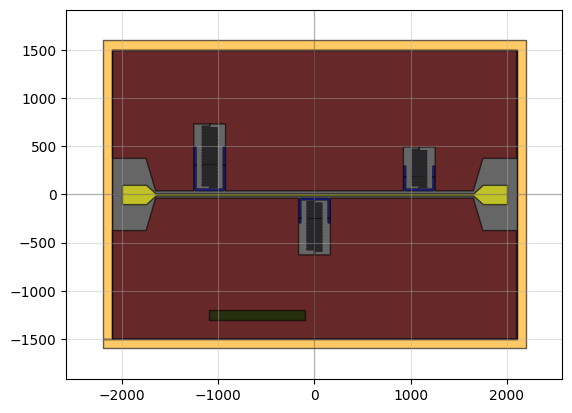

In [4]:
NumberOfResonators = int(3)
SeparationTlineResonator = [0]*NumberOfResonators

#cvl = np.linspace(200, 600, 10)
#nob = np.linspace(15, 40, 10, dtype=int)


#Resonator parameters
CapacitorHorizontalLength = np.ones(NumberOfResonators)*[300] 
CapacitorVerticalLength = np.ones(NumberOfResonators)*[450, 250, 250]
CapacitorWidth = np.ones(NumberOfResonators)*20 
 

NumberOfBends = np.ones(NumberOfResonators, dtype=int)*[40, 33, 24]
InductorVerticalLength = np.ones(NumberOfResonators)*[15] 
InductorEndLength = np.ones(NumberOfResonators)*[10] 
InductorHorizontalLength = np.ones(NumberOfResonators)*[150] 
InductorWidth = np.ones(NumberOfResonators)*[0.6] 
TaperWidth = np.ones(NumberOfResonators)*20 
InductorTotalLength = InductorVerticalLength*(NumberOfBends+4) + InductorEndLength +InductorHorizontalLength*(NumberOfBends+1) 
 
 
 
SpacingC0 = np.ones(NumberOfResonators)*5 
SpacingCc = np.ones(NumberOfResonators)*0
TaperLength = np.ones(NumberOfResonators)*5 
FinalSpacingBondpads = 100
 
FeedlineWidth = 20
FeedlineLength  = 3300
FeedlineGap= 27.5
FeedlineTaperLength =  100
BondpadWidth =  200
BondpadLength= 250
BondpadGap = BondpadWidth*FeedlineGap/FeedlineWidth

ChipSize = [FeedlineLength + 2*BondpadLength + 2*FeedlineTaperLength +200, 3000]

c, metal, chip = ChipResonatorsTline(ChipSize,NumberOfResonators, SeparationTlineResonator,
                        FeedlineWidth, FeedlineLength, FeedlineGap, 
                        FeedlineTaperLength, BondpadWidth, BondpadLength, BondpadGap,
                        CapacitorHorizontalLength, CapacitorVerticalLength, CapacitorWidth,
                        NumberOfBends, InductorVerticalLength, InductorHorizontalLength, InductorWidth, InductorEndLength,
                        TaperWidth, TaperLength, SpacingC0, SpacingCc,
                        FinalSpacingBondpads, MWO_simulation=False , cap_sim = False,
                         EdgeResDistanceFactor=0.33)



path = f"C:/Users/localadmin/Documents/GitHub/resonators/gds_files/202509-GeRes-Al"
if not os.path.exists(path):
    os.makedirs(path)  # Create the directory if it does not exist

chip.write_gds(f"C:/Users/localadmin/Documents/GitHub/resonators/gds_files/202509-GeRes-Al/202509-GeRes-Al-0p6-v4-0.gds")
qp(chip)

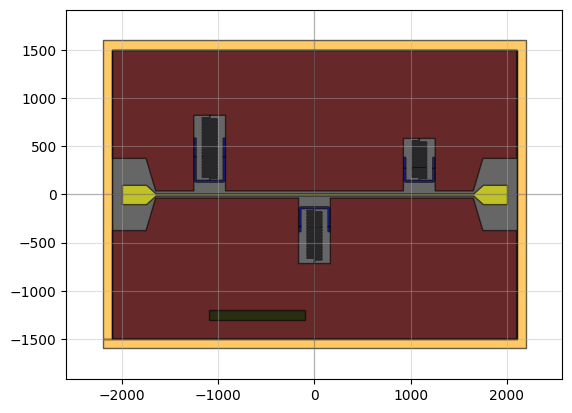

In [5]:
NumberOfResonators = int(3)
SeparationTlineResonator = [0]*NumberOfResonators

#cvl = np.linspace(200, 600, 10)
#nob = np.linspace(15, 40, 10, dtype=int)


#Resonator parameters
CapacitorHorizontalLength = np.ones(NumberOfResonators)*[300] 
CapacitorVerticalLength = np.ones(NumberOfResonators)*[450, 250, 250]
CapacitorWidth = np.ones(NumberOfResonators)*20 
 

NumberOfBends = np.ones(NumberOfResonators, dtype=int)*[40, 33, 24]
InductorVerticalLength = np.ones(NumberOfResonators)*[15] 
InductorEndLength = np.ones(NumberOfResonators)*[10] 
InductorHorizontalLength = np.ones(NumberOfResonators)*[150] 
InductorWidth = np.ones(NumberOfResonators)*[0.6] 
TaperWidth = np.ones(NumberOfResonators)*20 
InductorTotalLength = InductorVerticalLength*(NumberOfBends+4) + InductorEndLength +InductorHorizontalLength*(NumberOfBends+1) 
 
 
 
SpacingC0 = np.ones(NumberOfResonators)*5 
SpacingCc = np.ones(NumberOfResonators)*90
TaperLength = np.ones(NumberOfResonators)*5 
FinalSpacingBondpads = 100
 
FeedlineWidth = 20
FeedlineLength  = 3300
FeedlineGap= 27.5
FeedlineTaperLength =  100
BondpadWidth =  200
BondpadLength= 250
BondpadGap = BondpadWidth*FeedlineGap/FeedlineWidth

ChipSize = [FeedlineLength + 2*BondpadLength + 2*FeedlineTaperLength +200, 3000]

c, metal, chip = ChipResonatorsTline(ChipSize,NumberOfResonators, SeparationTlineResonator,
                        FeedlineWidth, FeedlineLength, FeedlineGap, 
                        FeedlineTaperLength, BondpadWidth, BondpadLength, BondpadGap,
                        CapacitorHorizontalLength, CapacitorVerticalLength, CapacitorWidth,
                        NumberOfBends, InductorVerticalLength, InductorHorizontalLength, InductorWidth, InductorEndLength,
                        TaperWidth, TaperLength, SpacingC0, SpacingCc,
                        FinalSpacingBondpads, MWO_simulation=False , cap_sim = False,
                         EdgeResDistanceFactor=0.33)



path = f"C:/Users/localadmin/Documents/GitHub/resonators/gds_files/202509-GeRes-Al"
if not os.path.exists(path):
    os.makedirs(path)  # Create the directory if it does not exist

chip.write_gds(f"C:/Users/localadmin/Documents/GitHub/resonators/gds_files/202509-GeRes-Al/202509-GeRes-Al-0p6-v4-90.gds")
qp(chip)

4000


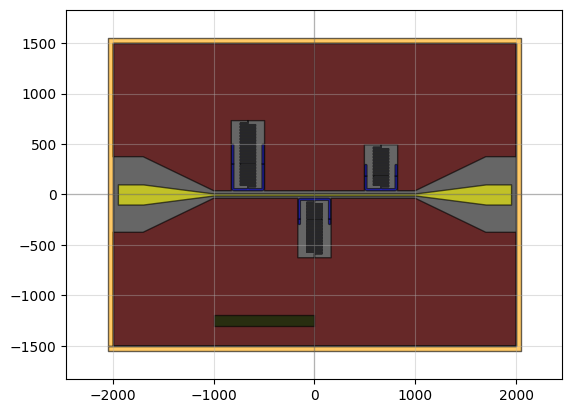

In [25]:
NumberOfResonators = int(3)
SeparationTlineResonator = [0]*NumberOfResonators

#cvl = np.linspace(200, 600, 10)
#nob = np.linspace(15, 40, 10, dtype=int)


#Resonator parameters
CapacitorHorizontalLength = np.ones(NumberOfResonators)*[300] 
CapacitorVerticalLength = np.ones(NumberOfResonators)*[450, 250, 250]
CapacitorWidth = np.ones(NumberOfResonators)*20 
 

NumberOfBends = np.ones(NumberOfResonators, dtype=int)*[40, 33, 24]
InductorVerticalLength = np.ones(NumberOfResonators)*[15] 
InductorEndLength = np.ones(NumberOfResonators)*[10] 
InductorHorizontalLength = np.ones(NumberOfResonators)*[150] 
InductorWidth = np.ones(NumberOfResonators)*[0.6] 
TaperWidth = np.ones(NumberOfResonators)*20 
InductorTotalLength = InductorVerticalLength*(NumberOfBends+4) + InductorEndLength +InductorHorizontalLength*(NumberOfBends+1) 
 
 
 
SpacingC0 = np.ones(NumberOfResonators)*5 
SpacingCc = np.ones(NumberOfResonators)*0
TaperLength = np.ones(NumberOfResonators)*5 
FinalSpacingBondpads = 50
 
FeedlineWidth = 20
FeedlineLength  = 2000
FeedlineGap= 27.5
FeedlineTaperLength =  700
BondpadWidth =  200
BondpadLength= 250
BondpadGap = BondpadWidth*FeedlineGap/FeedlineWidth

print(FeedlineLength + 2*BondpadLength + 2*FeedlineTaperLength +FinalSpacingBondpads*2)
ChipSize = [FeedlineLength + 2*BondpadLength + 2*FeedlineTaperLength +FinalSpacingBondpads*2, 3000]

c, metal, chip = ChipResonatorsTline(ChipSize,NumberOfResonators, SeparationTlineResonator,
                        FeedlineWidth, FeedlineLength, FeedlineGap, 
                        FeedlineTaperLength, BondpadWidth, BondpadLength, BondpadGap,
                        CapacitorHorizontalLength, CapacitorVerticalLength, CapacitorWidth,
                        NumberOfBends, InductorVerticalLength, InductorHorizontalLength, InductorWidth, InductorEndLength,
                        TaperWidth, TaperLength, SpacingC0, SpacingCc,
                        FinalSpacingBondpads, MWO_simulation=False , cap_sim = False,
                         EdgeResDistanceFactor=0.33)



path = f"C:/Users/localadmin/Documents/GitHub/resonators/gds_files/202509-GeRes-Al"
if not os.path.exists(path):
    os.makedirs(path)  # Create the directory if it does not exist

chip.write_gds(f"C:/Users/localadmin/Documents/GitHub/resonators/gds_files/202509-GeRes-Al/202509-GeRes-Al-0p6-v4-0-TEST_more.gds")
qp(chip)

4000


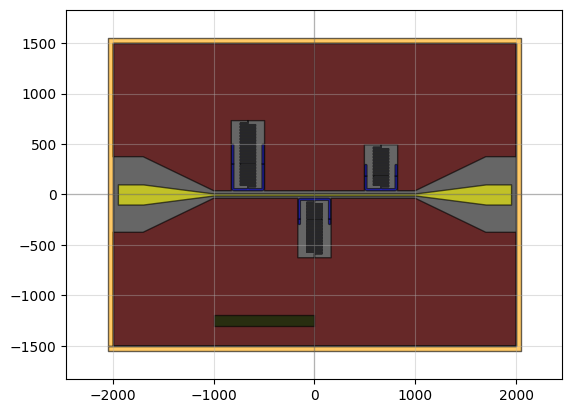

In [6]:
NumberOfResonators = int(3)
SeparationTlineResonator = [0]*NumberOfResonators

#cvl = np.linspace(200, 600, 10)
#nob = np.linspace(15, 40, 10, dtype=int)


#Resonator parameters
CapacitorHorizontalLength = np.ones(NumberOfResonators)*[300] 
CapacitorVerticalLength = np.ones(NumberOfResonators)*[450, 250, 250]
CapacitorWidth = np.ones(NumberOfResonators)*20 
 

NumberOfBends = np.ones(NumberOfResonators, dtype=int)*[40, 33, 24]
InductorVerticalLength = np.ones(NumberOfResonators)*[15] 
InductorEndLength = np.ones(NumberOfResonators)*[10] 
InductorHorizontalLength = np.ones(NumberOfResonators)*[150] 
InductorWidth = np.ones(NumberOfResonators)*[0.6] 
TaperWidth = np.ones(NumberOfResonators)*20 
InductorTotalLength = InductorVerticalLength*(NumberOfBends+4) + InductorEndLength +InductorHorizontalLength*(NumberOfBends+1) 
 
 
 
SpacingC0 = np.ones(NumberOfResonators)*5 
SpacingCc = np.ones(NumberOfResonators)*0
TaperLength = np.ones(NumberOfResonators)*5 
FinalSpacingBondpads = 50
 
FeedlineWidth = 20
FeedlineLength  = 2000
FeedlineGap= 27.5
FeedlineTaperLength =  700
BondpadWidth =  200
BondpadLength= 250
BondpadGap = BondpadWidth*FeedlineGap/FeedlineWidth

print(FeedlineLength + 2*BondpadLength + 2*FeedlineTaperLength +FinalSpacingBondpads*2)
ChipSize = [FeedlineLength + 2*BondpadLength + 2*FeedlineTaperLength +FinalSpacingBondpads*2, 3000]

c, metal, chip = ChipResonatorsTline(ChipSize,NumberOfResonators, SeparationTlineResonator,
                        FeedlineWidth, FeedlineLength, FeedlineGap, 
                        FeedlineTaperLength, BondpadWidth, BondpadLength, BondpadGap,
                        CapacitorHorizontalLength, CapacitorVerticalLength, CapacitorWidth,
                        NumberOfBends, InductorVerticalLength, InductorHorizontalLength, InductorWidth, InductorEndLength,
                        TaperWidth, TaperLength, SpacingC0, SpacingCc,
                        FinalSpacingBondpads, MWO_simulation=False , cap_sim = False,
                         EdgeResDistanceFactor=0.33)



path = f"C:/Users/localadmin/Documents/GitHub/resonators/gds_files/202509-GeRes-Al"
if not os.path.exists(path):
    os.makedirs(path)  # Create the directory if it does not exist

chip.write_gds(f"C:/Users/localadmin/Documents/GitHub/resonators/gds_files/202509-GeRes-Al/202509-GeRes-SiSubs-Al-0p6-v4-0um.gds")
qp(chip)